In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Lecture 9- Introduction to Natural Language Processing

# Table of Contents
* [Lecture 9- Introduction to Natural Language Processing](#Lecture-9--Introduction-to-Natural-Language-Processing)
	* &nbsp;
		* [Content](#Content)
		* [Learning Outcomes](#Learning-Outcomes)
* [1 NLP Basics](#1-NLP-Basics)
	* [Natural Language Toolkit (NLTK)](#Natural-Language-Toolkit-%28NLTK%29)
	* [Working with corpora text](#Working-with-corpora-text)
	* [Create a user-defined tokenizer](#Create-a-user-defined-tokenizer)
	* [Working with non-corpora text](#Working-with-non-corpora-text)
	* [1.1 Acquire Data](#1.1-Acquire-Data)
	* [1.2 Clean Text](#1.2-Clean-Text)
	* [1.3 Tokenize Text](#1.3-Tokenize-Text)
	* [1.4 Text Normalization](#1.4-Text-Normalization)
		* [Stemming](#Stemming)
		* [Lemmatization](#Lemmatization)
* [2. Text Semantic Analysis](#2.-Text-Semantic-Analysis)
	* [Analysing text - Collocations and n-grams](#Analysing-text---Collocations-and-n-grams)
* [3. Text Mining - Automated Document Summarization](#3.-Text-Mining---Automated-Document-Summarization)
	* &nbsp;
		* [Document topic discovery](#Document-topic-discovery)
		* [Text summarization](#Text-summarization)


---

### Content

1. Intro to NLP 
2. NLTK basics - working with corpora, free text, tokenization, stemming
3. Introductory semantic analysis - collocations, part-of-speech, chunking
4. Automatic document summarization

### Learning Outcomes

At the end of this lecture, you should be able to:

* describe the basic components of conducting NLP
* perform basic operations using the NLTK
* apply algorithms to documents in order to produce summaries
* perform introductory level text analysis

Content in this notebook is based on material in :
>Russell, M. A. (2013). Mining the Social Web: Data Mining Facebook, Twitter, LinkedIn, Google+, GitHub, and More. " O'Reilly Media, Inc.". Chicago

> Bird, S., Klein, E., & Loper, E. (2009). Natural language processing with Python. " O'Reilly Media, Inc.".

---

In [1]:
from IPython.core.display import HTML
HTML("<iframe src=http://www.wsj.com/articles/googles-open-source-parsey-mcparseface-helps-machines-understand-english-1463088180 width=1000 height=450></iframe>")

In [2]:
from IPython.core.display import HTML
HTML("<iframe src=https://www.rt.com/usa/342982-google-artificial-intelligence-software/ width=1000 height=450></iframe>")


http://www.cnet.com/news/google-offers-parsey-mcparseface-and-syntaxnet-ai-software-for-free/

# 1 NLP Basics

Technologies based on NLP are becoming increasingly widespread. For example,
phones and handheld computers support predictive text and handwriting recognition;
web search engines give access to information locked up in unstructured text and machine
translation. On top of this, with the explosion in social media, text mining, text analytics and semantic analysis have become big areas or research.

NLP is important for scientific, economic, social, and cultural reasons. 

NLP is experiencing rapid growth as its theories and methods are deployed in a variety of new language
technologies. For this reason it is important for a wide range of people to have a
working knowledge of NLP. 

Within industry, this includes people in human-computer
interaction, business information analysis, and web software development. Within
academia, it includes people in areas from humanities computing and corpus linguistics
through to computer science and artificial intelligence. In academia, NLP is known by the name of “Computational Linguistics.”

> Bird, S., Klein, E., & Loper, E. (2009). Natural language processing with Python. " O'Reilly Media, Inc.".

## Natural Language Toolkit (NLTK)

NLTK was originally created in 2001 as part of a computational linguistics course in
the Department of Computer and Information Science at the University of Pennsylvania.
Since then it has been developed and expanded with the help of dozens of contributors.
It has now been adopted in courses in dozens of universities, and serves as
the basis of many research projects.

## Working with corpora text

Some text documents have been compiled into corpora which are available for analysis.

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mtpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 20
rcParams['figure.dpi'] = 350
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'

In [5]:
import nltk

The following command enables us to download and install text corpora and extra packages through NLTK:

In [6]:
#make sure you set up your massey log in credentials if you are doing this in the lab
#nltk.set_proxy('http://alb-cache.massey.ac.nz/:8080', ('<YOUR_USERNAME>', '<YOUR_PASSWORD>'))

nltk.download()
#when the NLTK Donwloader window pops up, select the 'book' identifier and then press the download button to download att the necessary corpora

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

The Reuters Corpus contains 10,788 news documents totalling 1.3 million words. The
documents have been classified into 90 topics, and grouped into two sets, called “training”
and “test”; thus, the text with fileid 'test/14826' is a document drawn from the
test set. 

This split is for training and testing algorithms that automatically detect the
topic of a document. Each corpus is a compiled object that encapsulates the text and can perform a range of operations on.


In [8]:
from nltk.corpus import reuters

In [9]:
raw = reuters.raw()
raw[:1000]

u"ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT\n  Mounting trade friction between the\n  U.S. And Japan has raised fears among many of Asia's exporting\n  nations that the row could inflict far-reaching economic\n  damage, businessmen and officials said.\n      They told Reuter correspondents in Asian capitals a U.S.\n  Move against Japan might boost protectionist sentiment in the\n  U.S. And lead to curbs on American imports of their products.\n      But some exporters said that while the conflict would hurt\n  them in the long-run, in the short-term Tokyo's loss might be\n  their gain.\n      The U.S. Has said it will impose 300 mln dlrs of tariffs on\n  imports of Japanese electronics goods on April 17, in\n  retaliation for Japan's alleged failure to stick to a pact not\n  to sell semiconductors on world markets at below cost.\n      Unofficial Japanese estimates put the impact of the tariffs\n  at 10 billion dlrs and spokesmen for major electronics firms\n  said they would vir

Some of the corpora that have been compiled come with categories:

In [10]:
reuters.categories()[:10]

[u'acq',
 u'alum',
 u'barley',
 u'bop',
 u'carcass',
 u'castor-oil',
 u'cocoa',
 u'coconut',
 u'coconut-oil',
 u'coffee']

In [11]:
reuters.words()[:30]

[u'ASIAN',
 u'EXPORTERS',
 u'FEAR',
 u'DAMAGE',
 u'FROM',
 u'U',
 u'.',
 u'S',
 u'.-',
 u'JAPAN',
 u'RIFT',
 u'Mounting',
 u'trade',
 u'friction',
 u'between',
 u'the',
 u'U',
 u'.',
 u'S',
 u'.',
 u'And',
 u'Japan',
 u'has',
 u'raised',
 u'fears',
 u'among',
 u'many',
 u'of',
 u'Asia',
 u"'"]

In [12]:
reuters.words(categories=['cpu'])

[u'U', u'.', u'S', u'.', u'INDUSTRIAL', u'CAPACITY', ...]

The following command gives us the files that are part of the corpus:

In [13]:
reuters.fileids()[:30]

['test/14826',
 'test/14828',
 'test/14829',
 'test/14832',
 'test/14833',
 'test/14839',
 'test/14840',
 'test/14841',
 'test/14842',
 'test/14843',
 'test/14844',
 'test/14849',
 'test/14852',
 'test/14854',
 'test/14858',
 'test/14859',
 'test/14860',
 'test/14861',
 'test/14862',
 'test/14863',
 'test/14865',
 'test/14867',
 'test/14872',
 'test/14873',
 'test/14875',
 'test/14876',
 'test/14877',
 'test/14881',
 'test/14882',
 'test/14885']

Below are function names that can be called on each compiled corpus:

In [14]:
reuters.sents()[:2]

[[u'ASIAN',
  u'EXPORTERS',
  u'FEAR',
  u'DAMAGE',
  u'FROM',
  u'U',
  u'.',
  u'S',
  u'.-',
  u'JAPAN',
  u'RIFT',
  u'Mounting',
  u'trade',
  u'friction',
  u'between',
  u'the',
  u'U',
  u'.',
  u'S',
  u'.',
  u'And',
  u'Japan',
  u'has',
  u'raised',
  u'fears',
  u'among',
  u'many',
  u'of',
  u'Asia',
  u"'",
  u's',
  u'exporting',
  u'nations',
  u'that',
  u'the',
  u'row',
  u'could',
  u'inflict',
  u'far',
  u'-',
  u'reaching',
  u'economic',
  u'damage',
  u',',
  u'businessmen',
  u'and',
  u'officials',
  u'said',
  u'.'],
 [u'They',
  u'told',
  u'Reuter',
  u'correspondents',
  u'in',
  u'Asian',
  u'capitals',
  u'a',
  u'U',
  u'.',
  u'S',
  u'.',
  u'Move',
  u'against',
  u'Japan',
  u'might',
  u'boost',
  u'protectionist',
  u'sentiment',
  u'in',
  u'the',
  u'U',
  u'.',
  u'S',
  u'.',
  u'And',
  u'lead',
  u'to',
  u'curbs',
  u'on',
  u'American',
  u'imports',
  u'of',
  u'their',
  u'products',
  u'.']]

We can calculate the distribution frequency of each of the words as follows: 

In [15]:
freq = nltk.FreqDist(reuters.words())
freq

FreqDist({u'Durapipe': 1,
          u'EXPLAIN': 2,
          u'woods': 2,
          u'hanging': 3,
          u'hastily': 2,
          u'localized': 1,
          u'Schuster': 5,
          u'regularize': 1,
          u'LASR': 1,
          u'LAST': 22,
          u'Gelch': 2,
          u'Gelco': 26,
          u'refunding': 4,
          u'Western': 224,
          u'LASL': 2,
          u'Spiridellis': 3,
          u'passsengers': 1,
          u'Valli': 1,
          u'stipulate': 1,
          u'replaces': 8,
          u'Glatfelter': 4,
          u'Elex': 2,
          u'PORTLAND': 6,
          u'bringing': 65,
          u'XIDEX': 1,
          u'OMMEREN': 1,
          u'ASSETS': 46,
          u'wooden': 1,
          u'Pergamon': 3,
          u'Loeb': 1,
          u'wednesday': 1,
          u'ORIENTED': 1,
          u'Larsen': 2,
          u'Cahit': 2,
          u'shows': 54,
          u'Chalaby': 3,
          u'0053': 1,
          u'elections': 27,
          u'feasibility': 31,
          u'271'

Notice that the **collection of elements from the text comprises of elements which are not all words**. 

Some words may be misspelled as well in which case we might want to take them out. 

Below is an example of how we can extract only words from a given text that appear in a dictionary from a corpus. This command is not something you want to execute on  a large corpus though since it is slow:

In [16]:
#all valid English words according to this corpus
nltk.corpus.words.words()[:30]

[u'A',
 u'a',
 u'aa',
 u'aal',
 u'aalii',
 u'aam',
 u'Aani',
 u'aardvark',
 u'aardwolf',
 u'Aaron',
 u'Aaronic',
 u'Aaronical',
 u'Aaronite',
 u'Aaronitic',
 u'Aaru',
 u'Ab',
 u'aba',
 u'Ababdeh',
 u'Ababua',
 u'abac',
 u'abaca',
 u'abacate',
 u'abacay',
 u'abacinate',
 u'abacination',
 u'abaciscus',
 u'abacist',
 u'aback',
 u'abactinal',
 u'abactinally']

In [ ]:
#valid_words = set(word for word in reuters.words() if  word.lower() in nltk.corpus.words.words())
#valid_words

There is also a corpus of **stopwords**, that is, high-frequency words such as: the, to etc that we sometimes want to filter out of a document before further processing. 

Stopwords usually have little lexical content or meaning, and their presence in a text thus fails to distinguish
it from other texts.

In [17]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords[0:30]

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u'your',
 u'yours',
 u'yourself',
 u'yourselves',
 u'he',
 u'him',
 u'his',
 u'himself',
 u'she',
 u'her',
 u'hers',
 u'herself',
 u'it',
 u'its',
 u'itself',
 u'they',
 u'them',
 u'their',
 u'theirs',
 u'themselves',
 u'what']

You can expand stopwords to include symbols as well

In [18]:
stop_words = nltk.corpus.stopwords.words('english') + [
    '.',
    ',',
    '--',
    '\'s',
    '?',
    ')',
    '(',
    ':',
    '\'',
    '\'re',
    '"',
    '-',
    '}',
    '{',
    u'—',
    ]

Let’s define a function to compute what fraction of words in a text are not in the stopwords
list:

In [19]:
def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')
    #normalise text
    content = [w for w in text if w.lower() not in stopwords]
    return (len(content) * 1.0) / (len(text) * 1.0)

Let's run the reuters corpus through our function:

In [20]:
content_fraction(nltk.corpus.reuters.words())

0.735240435097661

In compiler and linguistic technical terms, characters combine to define **tokens**. 

**Tokens** are are individual words, symbols or numbers that have some meaning. Before any sense can be made of a text, it must first be tokenized into individual tokens.

In [21]:
some_text  = 'I went to uni today. I had lots of fun!'

tokens = nltk.word_tokenize(some_text)
tokens

['I', 'went', 'to', 'uni', 'today', '.', 'I', 'had', 'lots', 'of', 'fun', '!']

## Create a user-defined tokenizer

In order to do full semantic analysis or machine translation of a piece of text, it is necessary to retain symbols that might be a part of speech and impart meaning. 

There are however times when we want to remove them altogether. Below is a piece of code that creates a custom tokenizer which strips symbols from a string and converts into a list of tokens.

In [22]:
from nltk.tokenize import RegexpTokenizer

#w means tokens are made of only alphanumeric characters where + indicates that they comprise of one or more of such characters
tokenizer = RegexpTokenizer('\w+')

Rules for writing regular expressions can be found here: https://docs.python.org/2/howto/regex.html

In [23]:
tokens_cleaned = tokenizer.tokenize(some_text)
tokens_cleaned

['I', 'went', 'to', 'uni', 'today', 'I', 'had', 'lots', 'of', 'fun']

Lets remove stopwords from the list of tokens:

In [24]:
stopwords = nltk.corpus.stopwords.words('english')
content = [w for w in tokens_cleaned if w.lower() not in stopwords]
content

['went', 'uni', 'today', 'lots', 'fun']

## Working with non-corpora text

One of the most important sources of texts is undoubtedly the Web. 

It’s convenient to have existing text collections to explore, such as the compiled corpora, but there is much analysis to be done on non compiled texts.

In [25]:
!pip install feedparser

  Running setup.py bdist_wheel for feedparser: started
  Running setup.py bdist_wheel for feedparser: finished with status 'done'
  Stored in directory: C:\Users\OEM\AppData\Local\pip\Cache\wheels\15\ce\10\b500f745822ea6db6ea8ed225c06b15c000d71016b89ef9037
Successfully built feedparser


In [26]:
import os
import sys
import json
import feedparser
import requests
import pandas as pd
from nltk import clean_html
import urllib2
from bs4 import BeautifulSoup as bs

massey_proxies = {
  "http": "http://alb-cache.massey.ac.nz/",
  "https": "http://alb-cache.massey.ac.nz/",
}

#massey_proxies = ""

## 1.1 Acquire Data

Let's get text from an article on the web and do some processing of it:

In [27]:
from IPython.core.display import HTML
HTML("<iframe src=http://www.nzherald.co.nz/best-of-political-analysis/news/article.cfm?c_id=1502734&objectid=11325925 width=1000 height=350></iframe>")

In [28]:
HTML_PAGE = 'http://www.nzherald.co.nz/best-of-political-analysis/news/article.cfm?c_id=1502734&objectid=11325925'

response = requests.get(HTML_PAGE, proxies=massey_proxies)
response

<Response [200]>

In [29]:
page = response.content

## 1.2 Clean Text

The page variable has all the markup symbols which we need to strip away first of all.

In [30]:
bs_object = bs(page, "lxml")  
raw = bs_object.get_text()
raw[:1000]

u'   \nwindow.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o||e)},o,o.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<n.length;o++)r(n[o]);return r}({QJf3ax:[function(t,e){function n(){}function r(t){function e(t){return t&&t instanceof n?t:t?a(t,i,o):o()}function s(n,r,o){t&&t(n,r,o);for(var i=e(o),a=f(n),s=a.length,c=0;s>c;c++)a[c].apply(i,r);return i}function c(t,e){d[t]=f(t).concat(e)}function f(t){return d[t]||[]}function u(){return r(s)}var d={};return{on:c,emit:s,create:u,listeners:f,context:e,_events:d}}function o(){return new n}var i="nr@context",a=t("gos");e.exports=r()},{gos:"7eSDFh"}],ee:[function(t,e){e.exports=t("QJf3ax")},{}],3:[function(t){function e(t){try{i.console&&console.log(t)}catch(e){}}var n,r=t("ee"),o=t(1),i={};try{n=localStorage.getItem("__nr_flags").split(","),console&&"function"==typeof console.log&

We only get a partial job done. There is still a lot of rubbish in the text. 

In [31]:
#print len(raw)
print raw.find('Hell hath no fury')
print raw.find(' sights, not Key.')

start = raw.find('Hell hath no fury')
end = raw.find(' sights, not Key.')

31602
34503


In [32]:
cleaned = raw[start : end + len(' sights, not Key.')]
cleaned

u'Hell hath no fury like a voter who feels he or she has been treated like a fool. The political left was already paying a heavy price at this election for displaying the characteristics which leave voters stone cold - namely disunity, political incompetence and not a little arrogance. The left may now pay an even bigger price on Saturday thanks to Kim Dotcom\'s Moment of Truth evaporating into a Moment of Struth - as in "struth, was that all he had to reveal" after months of squashing much else far more worthy of debate out of the political picture. So robust was Dotcom\'s evidence of prime ministerial untruths supposed to be that it would sink John Key faster than the Bismarck. Instead it is Dotcom who is now facing a backlash for failing to deliver. So far, that backlash is confined to media who have been strung along for months. Voters may be more tolerant - but only up to a point. They take objection to being hoodwinked.  \raimRenderAd(300, 250, \'RECTANGLE\',\'ContentRect\',\'/SR

In [33]:
cleaned_article = cleaned.replace('''\n\n\t\t\t\t\t\t\n\t\t\t\t\t\t\t\taimRenderAd(300, 250, \'RECTANGLE\',\'ContentRect\',\'/SR=0/POS=2/VA=NO\');\n\t\t\t\t\t\t\t\n\t\t\t\t\t\tif(!$.browser.msie && $("#ContentRect").length){\n\t\t\t\t\t\t\tContentRect_frame = $("#ContentRect")[0];\n\t\t\t\t\t\t\tContentRect_frame.src = ContentRect_frame.src;\n\t\t\t\t\t\t}\n\t\t\t\t\t\n''', '')
cleaned_article 

u'Hell hath no fury like a voter who feels he or she has been treated like a fool. The political left was already paying a heavy price at this election for displaying the characteristics which leave voters stone cold - namely disunity, political incompetence and not a little arrogance. The left may now pay an even bigger price on Saturday thanks to Kim Dotcom\'s Moment of Truth evaporating into a Moment of Struth - as in "struth, was that all he had to reveal" after months of squashing much else far more worthy of debate out of the political picture. So robust was Dotcom\'s evidence of prime ministerial untruths supposed to be that it would sink John Key faster than the Bismarck. Instead it is Dotcom who is now facing a backlash for failing to deliver. So far, that backlash is confined to media who have been strung along for months. Voters may be more tolerant - but only up to a point. They take objection to being hoodwinked.  \raimRenderAd(300, 250, \'RECTANGLE\',\'ContentRect\',\'/SR

**Exercise:** Below is journalistic article covering the government spying in NZ. Your goal is to extract the relevant text from the url below, clean it, and store it as a string called 'cleaned2'.

In [34]:
HTML("<iframe src=https://firstlook.org/theintercept/2014/09/15/new-zealand-gcsb-speargun-mass-surveillance/ width=1000 height=450></iframe>")

In [47]:
HTML_PAGE = 'https://firstlook.org/theintercept/2014/09/15/new-zealand-gcsb-speargun-mass-surveillance/'

response = requests.get(HTML_PAGE, proxies=massey_proxies)
response

page = response.content
bs_object = bs(page, "lxml")  
raw = bs_object.get_text()
raw[:1000]

#print len(raw)
print raw.find('AUCKLAND, New Zealand')
print raw.find(' achieves Phase I.')

start = raw.find('AUCKLAND, New Zealand')
end = raw.find(' achieves Phase I.')

cleaned = raw[start : end + len(' achieves Phase I.')]
cleaned

cleaned2 = cleaned.replace('''\n\n\t\t\t\t\t\t\n\t\t\t\t\t\t\t\taimRenderAd(300, 250, \'RECTANGLE\',\'ContentRect\',\'/SR=0/POS=2/VA=NO\');\n\t\t\t\t\t\t\t\n\t\t\t\t\t\tif(!$.browser.msie && $("#ContentRect").length){\n\t\t\t\t\t\t\tContentRect_frame = $("#ContentRect")[0];\n\t\t\t\t\t\t\tContentRect_frame.src = ContentRect_frame.src;\n\t\t\t\t\t\t}\n\t\t\t\t\t\n''', '')
cleaned2 

479
4895


u'AUCKLAND, New Zealand\u2014The New Zealand spy agency, the Government Communications Security Bureau (GCSB), worked in 2012 and 2013 to implement a mass metadata surveillance system even as top government officials publicly insisted no such program was being planned and would not be legally permitted.\nDocuments provided by NSA whistleblower Edward Snowden show that the government worked in secret to exploit a new internet surveillance law enacted in the wake of revelations of illegal domestic spying to initiate a new metadata collection program that appeared designed to collect information about the communications of New Zealanders. Those actions are in direct conflict with the assurances given to the public\xa0by Prime Minister John Key (pictured above), who said\xa0the law was merely designed to fix \u201can ambiguous legal framework\u201d by expressly allowing the agency to do what it had done for years, that it \u201cisn\u2019t and will never be wholesale spying on New Zealander

You will notice that after the text has been cleaned, there are still many special unicode characters in the text, which you may or may not want to remove for further processing.

In [48]:
type(cleaned2)

unicode

Here is how to covert a unicode to ascii, ignoring and removing all unicode chars that cannot be represented in ascii:

In [49]:
cleaned2_str = cleaned2.encode('ascii','ignore')
cleaned2_str[:1000]

'AUCKLAND, New ZealandThe New Zealand spy agency, the Government Communications Security Bureau (GCSB), worked in 2012 and 2013 to implement a mass metadata surveillance system even as top government officials publicly insisted no such program was being planned and would not be legally permitted.\nDocuments provided by NSA whistleblower Edward Snowden show that the government worked in secret to exploit a new internet surveillance law enacted in the wake of revelations of illegal domestic spying to initiate a new metadata collection program that appeared designed to collect information about the communications of New Zealanders. Those actions are in direct conflict with the assurances given to the publicby Prime Minister John Key (pictured above), who saidthe law was merely designed to fix an ambiguous legal framework by expressly allowing the agency to do what it had done for years, that it isnt and will never be wholesale spying on New Zealanders, and the law isnt a revolution in the

## 1.3 Tokenize Text

Once the text has been cleaned, it can then be tokenized

**Exercise:** Your task now is to tokenize the above article string into a list of tokens.

We can take the *cleaned_article* string from the first example and create a NLTK Text object out of it which enables us to perform some additional operations on the text.

In [53]:
tokenized_article = tokenizer.tokenize(cleaned_article)
tokenized_article[:10]

[u'Hell',
 u'hath',
 u'no',
 u'fury',
 u'like',
 u'a',
 u'voter',
 u'who',
 u'feels',
 u'he']

We now create the Text object from it which gives us a number of methods that we can perform on it.

In [54]:
text_article = nltk.Text(tokenized_article)
text_article

<Text: Hell hath no fury like a voter who...>

We can now search for words or phrases in this Text and be shown the context in which they appear:

In [55]:
text_article.concordance('Dotcom')

Displaying 7 of 7 matches:
ger price on Saturday thanks to Kim Dotcom s Moment of Truth evaporating into 
the political picture So robust was Dotcom s evidence of prime ministerial unt
ter than the Bismarck Instead it is Dotcom who is now facing a backlash for fa
 that in treating voters like fools Dotcom has shown himself to be an even big
 camp was smart enough not to allow Dotcom to wreck Monday night s compelling 
 Likewise it was also smart to send Dotcom s evidence against Key to Parliamen
 a conspiracy which would have seen Dotcom extradited to the US to face copyri


**Exercise:** Perform the same steps in order to create a Text object from the article you cleaned previously and perform a concordance search for the word "spying".

We can plot the frequencies of the most commonly occuring words (30 in this example):

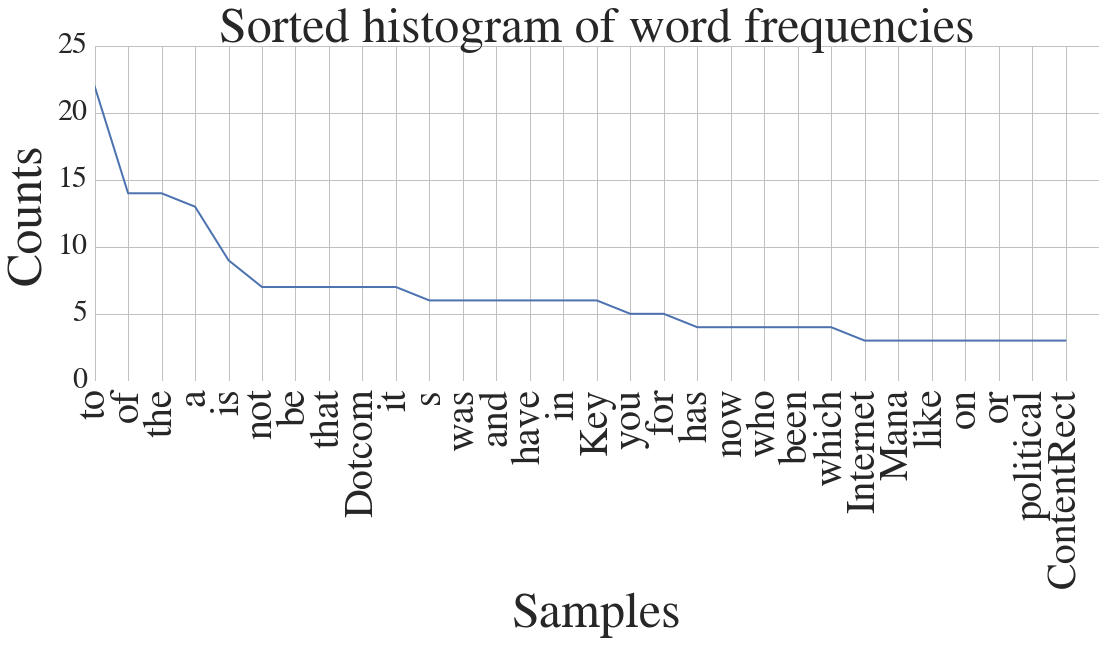

In [56]:
%matplotlib inline
f = plt.figure( figsize=(18, 6))
plt.xlabel('Words', size=50)
plt.ylabel('Counts', size=50)
plt.title('Sorted histogram of word frequencies', size=50)
rcParams['xtick.labelsize'] = 40
rcParams['ytick.labelsize'] = 30
text_article.plot(30)
ax = f.get_axes()



We can remove all the stop words from our list of tokens:

In [57]:
print tokenized_article[:1000]
[word for word in tokenized_article if word.lower() not in stopwords][:30]

[u'Hell', u'hath', u'no', u'fury', u'like', u'a', u'voter', u'who', u'feels', u'he', u'or', u'she', u'has', u'been', u'treated', u'like', u'a', u'fool', u'The', u'political', u'left', u'was', u'already', u'paying', u'a', u'heavy', u'price', u'at', u'this', u'election', u'for', u'displaying', u'the', u'characteristics', u'which', u'leave', u'voters', u'stone', u'cold', u'namely', u'disunity', u'political', u'incompetence', u'and', u'not', u'a', u'little', u'arrogance', u'The', u'left', u'may', u'now', u'pay', u'an', u'even', u'bigger', u'price', u'on', u'Saturday', u'thanks', u'to', u'Kim', u'Dotcom', u's', u'Moment', u'of', u'Truth', u'evaporating', u'into', u'a', u'Moment', u'of', u'Struth', u'as', u'in', u'struth', u'was', u'that', u'all', u'he', u'had', u'to', u'reveal', u'after', u'months', u'of', u'squashing', u'much', u'else', u'far', u'more', u'worthy', u'of', u'debate', u'out', u'of', u'the', u'political', u'picture', u'So', u'robust', u'was', u'Dotcom', u's', u'evidence', u'of

[u'Hell',
 u'hath',
 u'fury',
 u'like',
 u'voter',
 u'feels',
 u'treated',
 u'like',
 u'fool',
 u'political',
 u'left',
 u'already',
 u'paying',
 u'heavy',
 u'price',
 u'election',
 u'displaying',
 u'characteristics',
 u'leave',
 u'voters',
 u'stone',
 u'cold',
 u'namely',
 u'disunity',
 u'political',
 u'incompetence',
 u'little',
 u'arrogance',
 u'left',
 u'may']

**Exercise:** Create another Text object from the article in the previous exercises which this time has all the stopwords removed from it and plot the 20 most frequently occuring words:

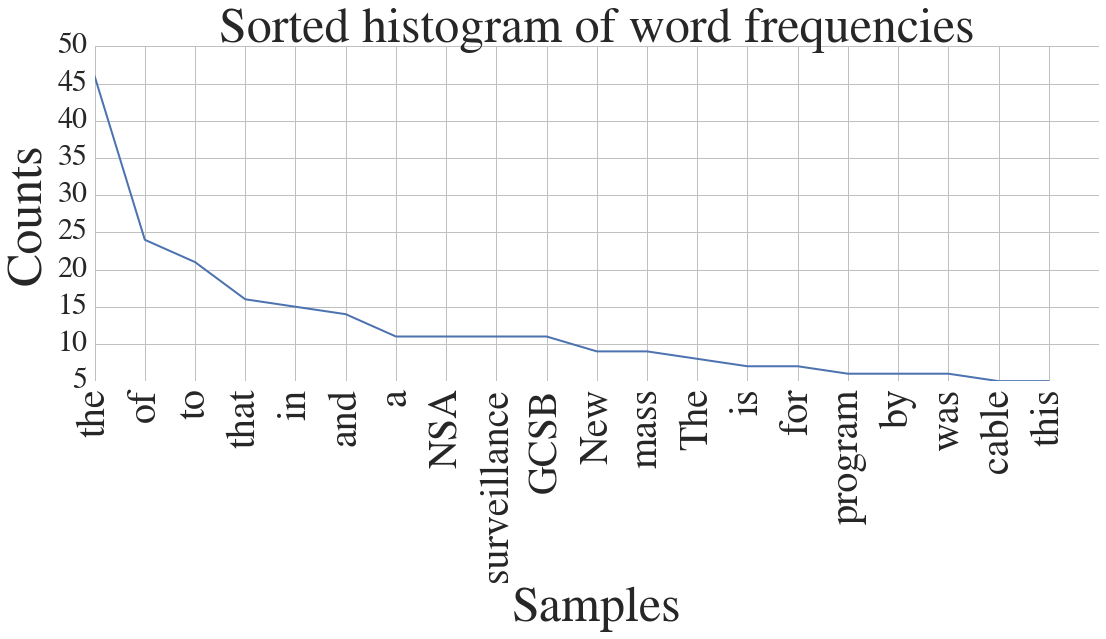

In [59]:
tokenized_article2 = tokenizer.tokenize(cleaned2)
[word for word in tokenized_article2 if word.lower() not in stopwords][:20]
text_article2 = nltk.Text(tokenized_article2)
text_article2
%matplotlib inline
f = plt.figure( figsize=(18, 6))
plt.xlabel('Words', size=50)
plt.ylabel('Counts', size=50)
plt.title('Sorted histogram of word frequencies', size=50)
rcParams['xtick.labelsize'] = 40
rcParams['ytick.labelsize'] = 30
text_article2.plot(20)
ax = f.get_axes()

If we needed to, we could remove all words from a piece of text which are not spelled correctly or are not words by verifying if they occur in an english dictionary:

In [58]:
valid_words = [word for word in tokenized_article if  word.lower() in nltk.corpus.words.words()]
print valid_words[:100]

[u'Hell', u'hath', u'no', u'fury', u'like', u'a', u'voter', u'who', u'he', u'or', u'she', u'been', u'like', u'a', u'fool', u'The', u'political', u'left', u'was', u'already', u'paying', u'a', u'heavy', u'price', u'at', u'this', u'election', u'for', u'the', u'which', u'leave', u'stone', u'cold', u'namely', u'disunity', u'political', u'incompetence', u'and', u'not', u'a', u'little', u'arrogance', u'The', u'left', u'may', u'now', u'pay', u'an', u'even', u'bigger', u'price', u'on', u'thanks', u'to', u'Kim', u's', u'Moment', u'of', u'Truth', u'into', u'a', u'Moment', u'of', u'Struth', u'as', u'in', u'struth', u'was', u'that', u'all', u'he', u'had', u'to', u'reveal', u'after', u'of', u'much', u'else', u'far', u'more', u'worthy', u'of', u'debate', u'out', u'of', u'the', u'political', u'picture', u'So', u'robust', u'was', u's', u'evidence', u'of', u'prime', u'ministerial', u'supposed', u'to', u'be', u'that']


We can from this, if we wish, create a vocabulary of the words used in a given text:

In [60]:
valid_words_lower = [ word.lower() for word in valid_words]
text_vocab = sorted(set(valid_words_lower))
text_vocab

[u'a',
 u'about',
 u'after',
 u'again',
 u'against',
 u'all',
 u'allow',
 u'along',
 u'already',
 u'also',
 u'an',
 u'and',
 u'are',
 u'arrogance',
 u'as',
 u'at',
 u'awful',
 u'backlash',
 u'be',
 u'been',
 u'being',
 u'bigger',
 u'blower',
 u'both',
 u'browser',
 u'bureau',
 u'but',
 u'by',
 u'camp',
 u'cold',
 u'committee',
 u'compelling',
 u'confined',
 u'conspiracy',
 u'copyright',
 u'could',
 u'cynical',
 u'debate',
 u'declare',
 u'defend',
 u'deliver',
 u'disunity',
 u'election',
 u'else',
 u'enough',
 u'even',
 u'evidence',
 u'exact',
 u'exception',
 u'excuse',
 u'face',
 u'facing',
 u'fail',
 u'failing',
 u'fake',
 u'far',
 u'faster',
 u'fed',
 u'following',
 u'fool',
 u'for',
 u'from',
 u'fury',
 u'get',
 u'given',
 u'going',
 u'government',
 u'grace',
 u'grounds',
 u'had',
 u'hath',
 u'have',
 u'he',
 u'heavy',
 u'hell',
 u'highly',
 u'him',
 u'himself',
 u'hone',
 u'however',
 u'if',
 u'in',
 u'incompetence',
 u'instead',
 u'into',
 u'is',
 u'it',
 u'its',
 u'journalist',
 

We can combine the above to reduce the text to only a valid word and non-stopword collection for a distribution frequency:

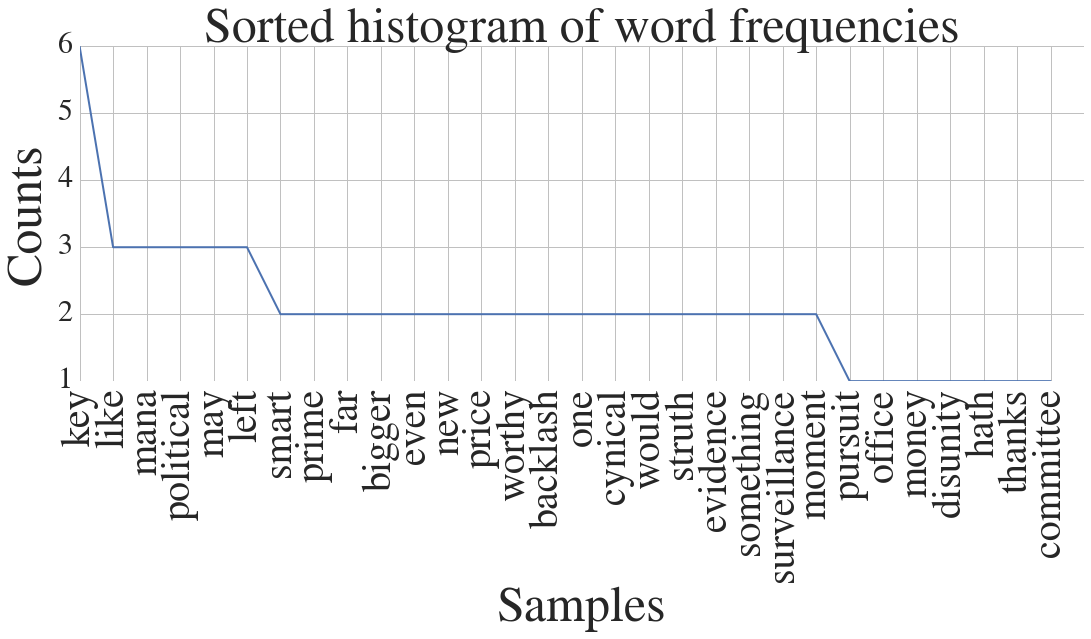

In [61]:
valid_text = nltk.Text(valid_words_lower)
no_stops = [word for word in valid_text if word.lower() not in stopwords]
no_stops = nltk.Text(no_stops)
f = plt.figure( figsize=(18, 6))
plt.xlabel('Samples', size=50)
plt.ylabel('Counts', size=50)
plt.title('Sorted histogram of word frequencies', size=50)
rcParams['xtick.labelsize'] = 40
no_stops.plot(30)

## 1.4 Text Normalization

Text normalization reduce a word to its base or stem form so that text analysis can be more accurate and meaningful by considering words that differ slightly as being same. There are two startegies for this: stemming and lemmatization.

### Stemming

Stemming is the simplest and computationally least expensive strategy which essentially chops off the ending of words in order to arrive at a normalized form.

In [62]:
from nltk.stem import PorterStemmer
porter_stemmer = PorterStemmer()

text = tokenizer.tokenize('women run running runs ran')
[ porter_stemmer.stem(word) for word in text]

[u'women', u'run', u'run', u'run', u'ran']

In [63]:
from nltk.stem.snowball import SnowballStemmer
snowball_stemmer = SnowballStemmer('english')

In [64]:
# example stemming
print snowball_stemmer.stem('charge')
print snowball_stemmer.stem('charging')
print snowball_stemmer.stem('charged')
print snowball_stemmer.stem('charges')

charg
charg
charg
charg


In [65]:
# stem the tokens
clean_tokens = tokenizer.tokenize(cleaned_article) 
stemmed_tokens = [snowball_stemmer.stem(t) for t in clean_tokens]
stemmed_tokens[:25]

[u'hell',
 u'hath',
 u'no',
 u'furi',
 u'like',
 u'a',
 u'voter',
 u'who',
 u'feel',
 u'he',
 u'or',
 u'she',
 u'has',
 u'been',
 u'treat',
 u'like',
 u'a',
 u'fool',
 u'the',
 u'polit',
 u'left',
 u'was',
 u'alreadi',
 u'pay',
 u'a']

### Lemmatization

Lemmatization is much more powerful since it employs a dictionary. Lemmatization employs a broader scope of fuzzy word matching.

In [66]:
lemmatizer = nltk.WordNetLemmatizer()

# compare stemmer to lemmatizer
print porter_stemmer.stem('dogs')
print lemmatizer.lemmatize('dogs')

print porter_stemmer.stem('wolves') # Beter for information retrieval and search
print lemmatizer.lemmatize('wolves') # Better for text analysis

# compare stemmer to lemmatizer
print porter_stemmer.stem('automobiles')
print lemmatizer.lemmatize('automobiles')

dog
dog
wolv
wolf
automobil
automobile


WorldNet Lemmatizer accepts the word if it is in the dictionary: 

In [67]:
lemmatizer_tokens = [lemmatizer.lemmatize(t) for t in clean_tokens]
lemmatizer_tokens[:35]

[u'Hell',
 u'hath',
 u'no',
 u'fury',
 u'like',
 u'a',
 u'voter',
 u'who',
 u'feel',
 u'he',
 u'or',
 u'she',
 u'ha',
 u'been',
 u'treated',
 u'like',
 u'a',
 u'fool',
 u'The',
 u'political',
 u'left',
 u'wa',
 u'already',
 u'paying',
 u'a',
 u'heavy',
 u'price',
 u'at',
 u'this',
 u'election',
 u'for',
 u'displaying',
 u'the',
 u'characteristic',
 u'which']

**Exercise:** Come up with a list of five nouns with irregular plurals and compare how lemmatization and stemming performs:


# 2. Text Semantic Analysis

The usual NLP pipeline involved in semantic analysis of text consists of the following steps depending on the domain and purpose of analysis: 

1. End of Sentence (EOS) Detection, then
2. Tokenization, then
3. Part-of-Speech (POS) Tagging, then
4. Chunking, then
5. Information Extraction

http://googleresearch.blogspot.co.nz/2016/05/announcing-syntaxnet-worlds-most.html

We have seen what tokenization and normalization are and how they are used at the most basic level of text processing. In order to make meaning of text though, words must be organised into sentences and then words in sentences must be identified according to their types.

The (EOS) Detection part looks at a text and first attempts to segment it based on sentences. It looks for beginning and the end of each sentence in order to give text structure.

In [68]:
text = 'Dr. Sheldon Cooper can be very abraisive to others with what he says. Dr. Sheldon Cooper is sometimes not much liked, but is very amusing.'
sentences = nltk.tokenize.sent_tokenize(text)
sentences

['Dr. Sheldon Cooper can be very abraisive to others with what he says.',
 'Dr. Sheldon Cooper is sometimes not much liked, but is very amusing.']

Following the EOS segmentation, the individual sentences are then tokenized as we have seen before.

In [69]:
tokens = [tokenizer.tokenize(sentence) for sentence in sentences] 
tokens

[['Dr',
  'Sheldon',
  'Cooper',
  'can',
  'be',
  'very',
  'abraisive',
  'to',
  'others',
  'with',
  'what',
  'he',
  'says'],
 ['Dr',
  'Sheldon',
  'Cooper',
  'is',
  'sometimes',
  'not',
  'much',
  'liked',
  'but',
  'is',
  'very',
  'amusing']]

POS tagging is very important for semantic analysis. 

Each word/token is decorated with a part of the speech or linguistic construct it belongs to. 

This can later be used for deriving meaning from a text and for example, for applying machine learning. 

In [70]:
pos_tagged_tokens = [nltk.pos_tag(token) for token in tokens] 
pos_tagged_tokens

[[('Dr', 'NNP'),
  ('Sheldon', 'NNP'),
  ('Cooper', 'NNP'),
  ('can', 'MD'),
  ('be', 'VB'),
  ('very', 'RB'),
  ('abraisive', 'JJ'),
  ('to', 'TO'),
  ('others', 'NNS'),
  ('with', 'IN'),
  ('what', 'WP'),
  ('he', 'PRP'),
  ('says', 'VBZ')],
 [('Dr', 'NNP'),
  ('Sheldon', 'NNP'),
  ('Cooper', 'NNP'),
  ('is', 'VBZ'),
  ('sometimes', 'RB'),
  ('not', 'RB'),
  ('much', 'JJ'),
  ('liked', 'VBN'),
  ('but', 'CC'),
  ('is', 'VBZ'),
  ('very', 'RB'),
  ('amusing', 'JJ')]]

Chunk extraction is a useful step towards achieving information extraction. It generates a parse trees from unstructured text. Given a parse tree of a sentence,  more specific information extraction like named entity recognition and relation extraction can be accomplished as a final step.

In [71]:
pos_tagged_chunks = [nltk.ne_chunk(chunk) for chunk in pos_tagged_tokens] 
pos_tagged_chunks

[Tree('S', [('Dr', 'NNP'), ('Sheldon', 'NNP'), ('Cooper', 'NNP'), ('can', 'MD'), ('be', 'VB'), ('very', 'RB'), ('abraisive', 'JJ'), ('to', 'TO'), ('others', 'NNS'), ('with', 'IN'), ('what', 'WP'), ('he', 'PRP'), ('says', 'VBZ')]),
 Tree('S', [('Dr', 'NNP'), ('Sheldon', 'NNP'), ('Cooper', 'NNP'), ('is', 'VBZ'), ('sometimes', 'RB'), ('not', 'RB'), ('much', 'JJ'), ('liked', 'VBN'), ('but', 'CC'), ('is', 'VBZ'), ('very', 'RB'), ('amusing', 'JJ')])]

The chunks can  be visually portrayed:

In [72]:
pos_tagged_chunks[0].pprint()

(S
  Dr/NNP
  Sheldon/NNP
  Cooper/NNP
  can/MD
  be/VB
  very/RB
  abraisive/JJ
  to/TO
  others/NNS
  with/IN
  what/WP
  he/PRP
  says/VBZ)


In [73]:
pos_tagged_chunks[0].draw()

Information Extraction involves analyzing each chunk and associating it with an additional tag. Information Extraction standardly consists of three subtasks: Named Entity Recognition, Relation Extraction and Template Filling.


## Analysing text - Collocations and n-grams

A collocation is a sequence of words that occur together unusually often. Examples: *red
wine*, *cosmetic surgery*, *large house* or a verbal phrase like *pick up*. 

The above are examples of bigrams, but of course this can be expanded to n-grams. 

n-gram models are very effective in modeling language data. This is a core part in statistical language applications. While n-gram analysis is a crucial part of many of the exiting applications NLP models such as machine translation applications, they are also complemented with other models such as Bayesian inference.
 
To get a handle on collocations, we start off by extracting from a text a list of word
pairs, also known as bigrams. This is easily accomplished with the function bigrams():

In [74]:
from nltk import bigrams
bgrs = bigrams(['more', 'is', 'said', 'than', 'done'])

for i in range(4):
    print bgrs.next()

('more', 'is')
('is', 'said')
('said', 'than')
('than', 'done')


Now, collocations are essentially just frequent bigrams or n-grams.

Below is an example of performing collocation analysis in order to draw out some meaning from the text by performing 2 and 3 word collocation analysis: 



In [75]:
from nltk.collocations import *

#tokenized_article = [word for word in tokenized_article if word not in stopwords]
bigram_measures = nltk.collocations.BigramAssocMeasures()


# change this to read in your data
finder = BigramCollocationFinder.from_words(tokenized_article)

# only bigrams that appear 2+ times
finder.apply_freq_filter(2) 

# return the 10 n-grams with the highest PMI
print "Bigram analysis"
print finder.nbest(bigram_measures.pmi, 15) 

Bigram analysis
[(u'even', u'bigger'), (u'ContentRect_frame', u'src'), (u'Internet', u'Mana'), (u'an', u'even'), (u'Snowden', u'and'), (u's', u'evidence'), (u'will', u'be'), (u'has', u'been'), (u'is', u'now'), (u'have', u'been'), (u'Moment', u'of'), (u'out', u'of'), (u'Dotcom', u's'), (u'you', u'have'), (u'like', u'a')]


In [76]:
# change this to read in your data
finder = nltk.collocations.TrigramCollocationFinder.from_words(tokenized_article)

# only trigrams that appear 2+ times
finder.apply_freq_filter(2) 

trigram_measures = nltk.collocations.TrigramAssocMeasures()

print "Trigram analysis"
print finder.nbest(trigram_measures.pmi, 15) 

Trigram analysis
[(u'an', u'even', u'bigger'), (u'Dotcom', u's', u'evidence')]


**Exercise:** Perform bi and tri gram analysis on the article from the previous exercise but this time remove all the stop words before the analysis:

In [77]:
from nltk.collocations import *

#tokenized_article = [word for word in tokenized_article if word not in stopwords]
bigram_measures = nltk.collocations.BigramAssocMeasures()


# change this to read in your data
finder = BigramCollocationFinder.from_words(tokenized_article2)

# only bigrams that appear 2+ times
finder.apply_freq_filter(2) 

# return the 10 n-grams with the highest PMI
print "Bigram analysis"
print finder.nbest(bigram_measures.pmi, 15) 

Bigram analysis
[(u'isn', u't'), (u'Phase', u'I'), (u'Prime', u'Minister'), (u'not', u'be'), (u'provided', u'by'), (u'top', u'secret'), (u'cable', u'access'), (u'The', u'Intercept'), (u'New', u'Zealand'), (u'New', u'Zealanders'), (u'NSA', u'document'), (u'a', u'new'), (u'mass', u'surveillance'), (u'designed', u'to'), (u'to', u'implement')]


Putting it all together:

**Exercise:** Write a function that accepts an article/document as a string and then prints the following:

- number of sentences in it
- number of words
- number of unique words
- number of hapaxes (words that appear only once: call hapaxes() on the frequency distribution object)
- plot frequency distribution of the top 10 words
- print 10 most frequent words
- list of bigrams
- list of trigrams

In [ ]:
import json
import nltk
from nltk import bigrams
from nltk.collocations import *

def summarise_text_features(text):
    #YOUR CODE HERE

summarise_text_features(cleaned_article)

Semantic analysis is a very large field of study. The above steps represents the building of the foundations on top of which more sophisticated analysis can then be performed. 

# 3. Text Mining - Automated Document Summarization 

Automatic text summarization reduces a text document in order to create a summary that retains the most important points from the original. 

Due to the increasing problem of information overload, applications and research into interest automatic summarization has also increased and this has become an important area within machine learning and data mining.

Summarization technologies are used today in many industry sectors. Google is the best example. But news and media outlets also heavily use these technologies.

In [78]:
!pip install lda

### Document topic discovery

Latent Dirichlet Allocation (LDA) is a powerful algorithm which can automatically discover topics from sentences.

LDA defines each topic as a bag of words, though it does not determne what the topis is. You have to label the topics as you deem fit.

The algorithm is essentially iterative. It will check and update topic assignments, looping through each word in every document. For each word, its topic assignment is updated based on two criteria:

    How prevalent is that word across topics?

    How prevalent are topics in the document?

In [79]:
import lda
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate a count vectorizer with two additional parameters
vect = CountVectorizer(stop_words='english', ngram_range=[1,3]) 
sentences_train = vect.fit_transform( nltk.tokenize.sent_tokenize(cleaned_article) )

In [80]:
# Instantiate an LDA model
model = lda.LDA(n_topics=10, n_iter=500)
model.fit(sentences_train) # Fit the model 
n_top_words = 10
topic_word = model.topic_word_
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vect.get_feature_names())[np.argsort(topic_dist)][:-n_top_words:-1]
    print('Topic {}: {}'.format(i, ', '.join(topic_words)))

Topic 0: residency, seen dotcom, facing, face copyright theft, extradited face copyright, extradited face, email grounds judicial, email deemed, election displaying characteristics
Topic 1: key, saturday, prime, rectangle contentrect, supposed sink, supposed sink john, office, office pretty naive, opposition parties
Topic 2: internet, internet mana, mana, naive, testimony, testimony whistle, testimony whistle blower, communications security, saving grace
Topic 3: dotcom, bigger, months, far, key faster bismarck, moment truth, msie contentrect length, debate political picture, debate political
Topic 4: voters, surveillance, sensitive documents defend, edward snowden, dotcom wreck monday, browser, dotcom shown, point, tolerant
Topic 5: dotcom, email, key, backlash, greenwald, consists, snowden greenwald hone, glenn greenwald, deliver
Topic 6: left, political, struth, moment, worthy, price, paying heavy price, paying heavy, saturday thanks kim
Topic 7: contentrect, evidence, src, robust d

**Exercise:** Extract a web based document and run topic discovery on it using LDA. How meaningful are the results?

In [82]:
import lda
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate a count vectorizer with two additional parameters
vect = CountVectorizer(stop_words='english', ngram_range=[1,3]) 
sentences_train = vect.fit_transform( nltk.tokenize.sent_tokenize(cleaned_article) )

In [83]:
# Instantiate an LDA model
model = lda.LDA(n_topics=10, n_iter=500)
model.fit(sentences_train) # Fit the model 
n_top_words = 10
topic_word = model.topic_word_
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vect.get_feature_names())[np.argsort(topic_dist)][:-n_top_words:-1]
    print('Topic {}: {}'.format(i, ', '.join(topic_words)))

Topic 0: contentrect_frame, internet, mana, internet mana, snowden, dotcom, contentrect_frame src, src saving grace, msie
Topic 1: far, months, backlash, moment, saturday, struth, instead, reveal months, reveal months squashing
Topic 2: prime, think, following granted new, means turfing, means, seen dotcom, seen, office pretty, dotcom evidence prime
Topic 3: political, worthy, left, price, bigger, incompetence, displaying, incompetence little arrogance, characteristics leave voters
Topic 4: key, money laundering charges, untruths supposed, surveillance excites silent, revenge opposition parties, robust, excites silent, robust dotcom evidence, money laundering
Topic 5: dotcom, evidence, smart, new, dotcom evidence, send dotcom, ministerial, send, parliament speaker reference
Topic 6: like, voters, contentrect, src, like voter feels, grace internet mana, src saving, browser msie, src contentrect_frame src
Topic 7: cynical, greenwald, harawira, highly, harre took, harre took strong, sensi

### Text summarization

The following algorithm is attributed to H.P. Luhn

> Luhn, H. P. (1958). The automatic creation of literature abstracts. IBM Journal of research and development, 2(2), 159-165.

The algorithm is implemented in the book:

> Russell, M. A. (2013). Mining the Social Web: Data Mining Facebook, Twitter, LinkedIn, Google+, GitHub, and More. " O'Reilly Media, Inc.".


The algorithm is based on sentence detection and frequency distribution analysis. Essentially, the algorithms filters out sentences containing frequently occurring words that occur in close proximity to one another.

In [84]:
# -*- coding: utf-8 -*-

#source https://github.com/ptwobrussell/Mining-the-Social-Web/blob/master/python_code/blogs_and_nlp__summarize.py

import sys
import json
import nltk
import numpy

N = 50  # Number of words to consider
CLUSTER_THRESHOLD = 5  # Distance between words to consider
TOP_SENTENCES = 3  # Number of sentences to return for a "top n" summary

# Approach taken from "The Automatic Creation of Literature Abstracts" by H.P. Luhn

def _score_sentences(sentences, important_words):
    scores = []
    sentence_idx = -1

    for s in [nltk.tokenize.word_tokenize(s) for s in sentences]:

        sentence_idx += 1
        word_idx = []

        # For each word in the word list...
        for w in important_words:
            try:
                # Compute an index for where any important words occur in the sentence
                word_idx.append(s.index(w))
            except ValueError, e: # w not in this particular sentence
                pass

        word_idx.sort()

        # It is possible that some sentences may not contain any important words at all
        if len(word_idx)== 0: continue

        # Using the word index, compute clusters by using a max distance threshold
        # for any two consecutive words

        clusters = []
        cluster = [word_idx[0]]
        i = 1
        while i < len(word_idx):
            if word_idx[i] - word_idx[i - 1] < CLUSTER_THRESHOLD:
                cluster.append(word_idx[i])
            else:
                clusters.append(cluster[:])
                cluster = [word_idx[i]]
            i += 1
        clusters.append(cluster)

        # Score each cluster. The max score for any given cluster is the score 
        # for the sentence

        max_cluster_score = 0
        for c in clusters:
            significant_words_in_cluster = len(c)
            total_words_in_cluster = c[-1] - c[0] + 1
            score = 1.0 * significant_words_in_cluster \
                * significant_words_in_cluster / total_words_in_cluster

            if score > max_cluster_score:
                max_cluster_score = score

        scores.append((sentence_idx, score))

    return scores

In [85]:
def summarize(txt):
    sentences = [s for s in nltk.tokenize.sent_tokenize(txt)]
    normalized_sentences = [s.lower() for s in sentences]

    words = [w.lower() for sentence in normalized_sentences for w in
             nltk.tokenize.word_tokenize(sentence)]

    fdist = nltk.FreqDist(words)

    top_n_words = [w[0] for w in fdist.items() 
            if w[0] not in nltk.corpus.stopwords.words('english')][:N]

    scored_sentences = _score_sentences(normalized_sentences, top_n_words)

    # Summaization Approach 1:
    # Filter out non-significant sentences by using the average score plus a
    # fraction of the std dev as a filter

    avg = numpy.mean([s[1] for s in scored_sentences])
    std = numpy.std([s[1] for s in scored_sentences])
    mean_scored = [(sent_idx, score) for (sent_idx, score) in scored_sentences
                   if score > avg + 0.5 * std]

    # Summarization Approach 2:
    # Another approach would be to return only the top N ranked sentences

    top_n_scored = sorted(scored_sentences, key=lambda s: s[1])[-TOP_SENTENCES:]
    top_n_scored = sorted(top_n_scored, key=lambda s: s[0])

    # Decorate the post object with summaries

    return dict(top_n_summary=[sentences[idx] for (idx, score) in top_n_scored],
                mean_scored_summary=[sentences[idx] for (idx, score) in mean_scored])

Take time to study the algorithm yourself if you wish. Understanding the details however is not crucial. In essence, the algorithm works by setting the parameter N that determines how many key words you assume are key in the document. The value or score of each sentence is determined by the number of the key words appearing in them. The key words are determined by their frequency. The document is then summarized by the selected number of top sentences.  

In [86]:
print cleaned_article

print len(nltk.tokenize.sent_tokenize(cleaned_article))

type(cleaned_article)

  Perhaps the only saving grace for Internet-Mana is that in treating voters like fools, Dotcom has shown himself to be an even bigger one. He is now a national laughing stock. But it could have been worse. At least someone in the Internet-Mana camp was smart enough not to allow Dotcom to wreck Monday night's compelling testimony from whistle-blower Edward Snowden and journalist Glenn Greenwald regarding whether or not there is or has been mass surveillance of New Zealanders by the Government Communications Security Bureau. Likewise it was also smart to send Dotcom's "evidence" against Key to Parliament's Speaker for reference to its privileges committee. This consists of just one email deemed to be a fake which implicates Key in a conspiracy which would have seen Dotcom extradited to the US to face copyright theft and money laundering charges following him being granted New Zealand residency. The ruse by Internet-Mana's leaders has given them an excuse not to talk about the email on t

unicode

In [87]:
print summarize(cleaned_article)['top_n_summary']
print len(summarize(cleaned_article)['top_n_summary'])

[u'The left may now pay an even bigger price on Saturday thanks to Kim Dotcom\'s Moment of Truth evaporating into a Moment of Struth - as in "struth, was that all he had to reveal" after months of squashing much else far more worthy of debate out of the political picture.', u'So far, that backlash is confined to media who have been strung along for months.', u'On Saturday, they may exact awful revenge - and it will be Opposition parties who will be in their sights, not Key.']
3


In [88]:
print summarize(cleaned_article)['mean_scored_summary']
print len(summarize(cleaned_article)['mean_scored_summary'])

[u'So far, that backlash is confined to media who have been strung along for months.']
1


**Exercise:** Extract a web based document and summarize it using the above code. 

Experiment with different number of N for key words, number of sentences and the distance between the clusters:

In [89]:
print summarize(cleaned2)['top_n_summary']

[u'Those actions are in direct conflict with the assurances given to the public\xa0by Prime Minister John Key (pictured above), who said\xa0the law was merely designed to fix \u201can ambiguous legal framework\u201d by expressly allowing the agency to do what it had done for years, that it \u201cisn\u2019t and will never be wholesale spying on New Zealanders,\u201d and the law \u201cisn\u2019t a revolution in the way New Zealand conducts its intelligence operations.\u201d\nSnowden, in a post for The Intercept\xa0published today, accused Prime Minster Key of fundamentally misleading the public about GCSB\u2019s role in mass surveillance.', u'They also provide access to the communications of millions of New Zealanders to the NSA at facilities such as the GCSB facility in Waihopai, and the Prime Minister is personally aware of this fact.\u201d\nTop secret documents provided by the whistleblower demonstrate that the GCSB, with ongoing NSA cooperation, implemented Phase I of the mass survei

In [90]:
print summarize(cleaned2)['mean_scored_summary']

[u'Those actions are in direct conflict with the assurances given to the public\xa0by Prime Minister John Key (pictured above), who said\xa0the law was merely designed to fix \u201can ambiguous legal framework\u201d by expressly allowing the agency to do what it had done for years, that it \u201cisn\u2019t and will never be wholesale spying on New Zealanders,\u201d and the law \u201cisn\u2019t a revolution in the way New Zealand conducts its intelligence operations.\u201d\nSnowden, in a post for The Intercept\xa0published today, accused Prime Minster Key of fundamentally misleading the public about GCSB\u2019s role in mass surveillance.', u'They also provide access to the communications of millions of New Zealanders to the NSA at facilities such as the GCSB facility in Waihopai, and the Prime Minister is personally aware of this fact.\u201d\nTop secret documents provided by the whistleblower demonstrate that the GCSB, with ongoing NSA cooperation, implemented Phase I of the mass survei

It is always important and helpful to be able to visualize the results from summarization.

The code below writes the summaries in an HTML format and writes it to a file, showing in detail which components of a document are extracted.

In [91]:
#code source = https://github.com/ptwobrussell/Mining-the-Social-Web/blob/master/python_code/blogs_and_nlp__summarize_markedup_output.py

HTML_TEMPLATE = """<html>
    <head>
        <title>%s</title>
        <meta http-equiv="Content-Type" content="text/html; charset=UTF-8"/>
    </head>
    <body>%s</body>
</html>"""

if not os.path.isdir('out/summarize'):
    os.makedirs('out/summarize')

post = {}
post.update(summarize(cleaned_article))
post['title'] = 'NZSpying'

print post
# You could also store a version of the full post with key sentences markedup
# for analysis with simple string replacement...

for summary_type in ['top_n_summary', 'mean_scored_summary']:
    post[summary_type + '_marked_up'] = '<p>%s</p>' % (cleaned_article, )
    for s in post[summary_type]:
        post[summary_type + '_marked_up'] = \
        post[summary_type + '_marked_up'].replace(s, '<strong>%s</strong>' % (s, ))

    filename = post['title'] + '.summary.' + summary_type + '.html'
    f = open(os.path.join('out', 'summarize', filename), 'w')
    html = HTML_TEMPLATE % (post['title'] + ' Summary', post[summary_type + '_marked_up'],)
    f.write(html.encode('utf-8'))
    f.close()

    print >> sys.stderr, "Data written to", f.name

{'top_n_summary': [u'The left may now pay an even bigger price on Saturday thanks to Kim Dotcom\'s Moment of Truth evaporating into a Moment of Struth - as in "struth, was that all he had to reveal" after months of squashing much else far more worthy of debate out of the political picture.', u'So far, that backlash is confined to media who have been strung along for months.', u'On Saturday, they may exact awful revenge - and it will be Opposition parties who will be in their sights, not Key.'], 'mean_scored_summary': [u'So far, that backlash is confined to media who have been strung along for months.'], 'title': 'NZSpying'}


Data written to out\summarize\NZSpying.summary.top_n_summary.html
Data written to out\summarize\NZSpying.summary.mean_scored_summary.html


In [92]:
import IPython.lib.display
from IPython.display import display

local_file = IPython.lib.display.FileLink("out/summarize/NZSpying.summary.top_n_summary.html")
display(local_file)
local_file = IPython.lib.display.FileLink("out/summarize/NZSpying.summary.mean_scored_summary.html")
display(local_file)

D:\Jupyter\out\summarize\NZSpying.summary.top_n_summary.html

D:\Jupyter\out\summarize\NZSpying.summary.mean_scored_summary.html

In [93]:
%%javascript
require(['base/js/utils'],
function(utils) {
   utils.load_extensions('calico-spell-check', 'calico-document-tools', 'calico-cell-tools');
});

<IPython.core.display.Javascript object>